# Interprétation de l'ACP

## Question 1
Importer les données :

In [1]:
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [19]:
meteo_mars = pd.read_csv('meteo_mars.csv',sep=';',decimal=',',index_col=0)
meteo_mars.head()

,PSTATM,TMMOY,RR,FXAB
7005,1006.2,6.1,68.0,24.9
7015,1008.9,6.3,58.0,25.8
7020,1012.9,8.2,88.0,35.0
7027,1007.1,6.4,74.0,29.6
7037,996.5,6.0,76.0,23.9


In [20]:
stations = pd.read_csv('postes.csv',sep=';',index_col=0)
stations.head()

,Nom,Latitude,Longitude,Altitude
7005,ABBEVILLE,50.136000,1.834000,69
7015,LILLE-LESQUIN,50.570000,3.097500,47
7020,PTE DE LA HAGUE,49.725167,-1.939833,6
7027,CAEN-CARPIQUET,49.180000,-0.456167,67
7037,ROUEN-BOOS,49.383000,1.181667,151


In [21]:
meteo = pd.concat([stations,meteo_mars],axis=1,join='inner')
meteo.head()
meteo.shape

(41, 8)

In [22]:
meteo = meteo.dropna()
meteo.shape

(39, 8)

## Question 2
Effectuer une ACP sans la variable **Altitude**.

In [23]:
from sklearn.decomposition import PCA

In [26]:
sklearn_pca = PCA() 
meteo_pca = sklearn_pca.fit_transform(meteo.drop(['Nom','Altitude'],1))  

## Question 3

Représenter la part de variance expliquée par les différentes composantes principales.

<IPython.core.display.Javascript object>


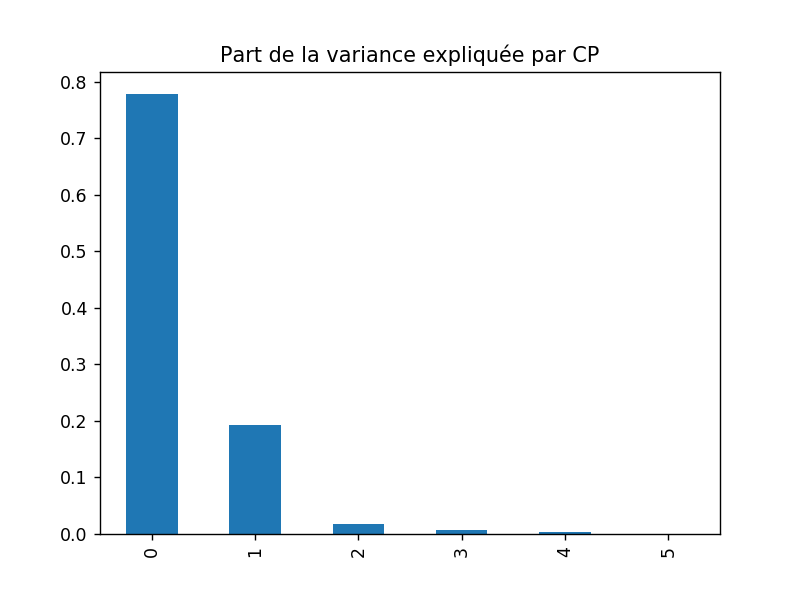

array([  7.78332361e-01,   1.92769916e-01,   1.73012811e-02,
         7.56985162e-03,   3.84531546e-03,   1.81274322e-04])

In [27]:
plt.figure()
scree = pd.Series(sklearn_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")
sklearn_pca.explained_variance_ratio_

Par définition des composantes principales (CP), la part de variance expliquée par CP est décroissante.  On voit qu'à partir de la troisième CP la part de variance expliquée est négligeable.

<IPython.core.display.Javascript object>


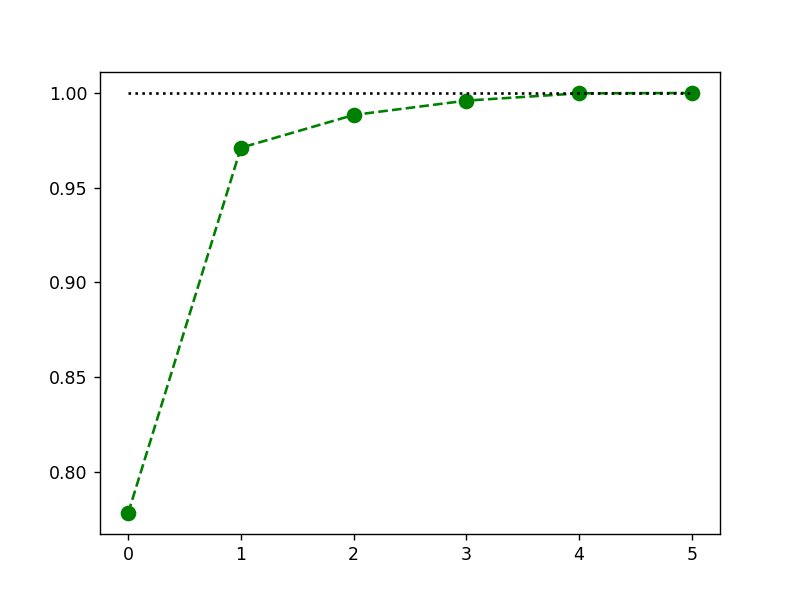

In [28]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

Le graphique des parts cumulées de variance expliquée par les CP montre que la quasi-totalité de la variabilité dans les données est capturée par les deux premières CP (supérieur à 95%). La perte d'information est alors minimale lorsqu'on représente les données par les deux premières CP.

## Question 4
Nuage des points des deux premières CP avec les valeurs de l'**Altitude** pour quelques points.

<IPython.core.display.Javascript object>


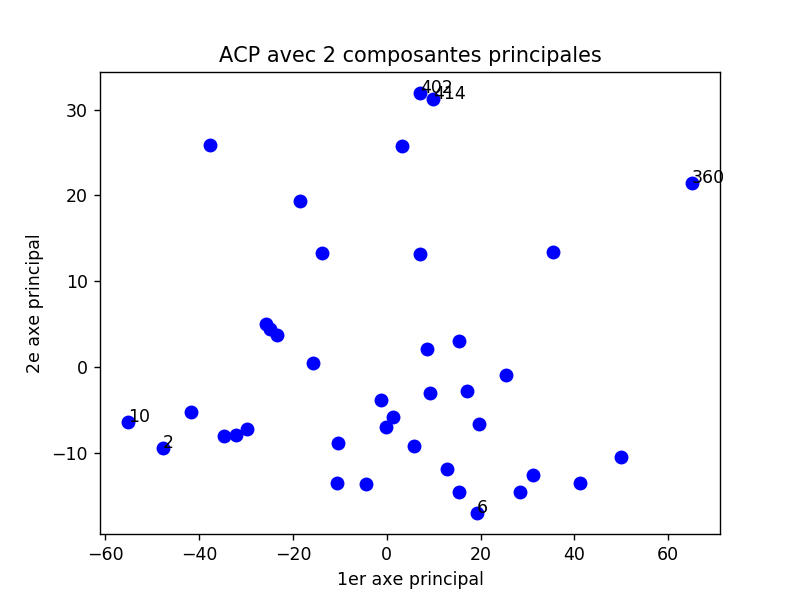

Text(9.852,31.2464,u'414')

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(meteo_pca[:,0],meteo_pca[:,1], 'o', markersize=7, color='blue', label=u'Métropole')
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.title('ACP avec 2 composantes principales')
singleobs = meteo_pca[:,0].argmin()
ax.text(meteo_pca[singleobs,0],meteo_pca[singleobs,1], str(meteo.loc[meteo.index[singleobs],'Altitude']))
singleobs = meteo_pca[:,0].argmax()
ax.text(meteo_pca[singleobs,0],meteo_pca[singleobs,1], str(meteo.loc[meteo.index[singleobs],'Altitude']))
singleobs = meteo_pca[:,1].argmin()
ax.text(meteo_pca[singleobs,0],meteo_pca[singleobs,1], str(meteo.loc[meteo.index[singleobs],'Altitude']))
singleobs = meteo_pca[:,1].argmax()
ax.text(meteo_pca[singleobs,0],meteo_pca[singleobs,1], str(meteo.loc[meteo.index[singleobs],'Altitude']))
singleobs = meteo['Altitude'].argmin()
ax.text(meteo_pca[meteo.index==singleobs,0],meteo_pca[meteo.index==singleobs,1], str(meteo.loc[singleobs,'Altitude']))
singleobs = meteo['Altitude'].argmax()
ax.text(meteo_pca[meteo.index==singleobs,0],meteo_pca[meteo.index==singleobs,1], str(meteo.loc[singleobs,'Altitude']))

On observe que les observations en bas (à gauche) du graphique ont les valeurs les plus élevées de l'**Altitude**, alors que les stations de petite altitude se trouvent en haut (à droite). Ceci veut dire qu'il semble que l'**Altitude**, une variable qui n'a pas été prise en compte dans cette ACP, est très liée à la nature des données et qu'il y a une forte corrélation entre l'**Altitude** et les deux premières CP.

## Question 5
Cercle des corrélations.

In [33]:
def myPCA(df):
	# Normalize data
	df_norm = (df - df.mean()) / df.std()
	# PCA
	pca = PCA()
	pca_res = pca.fit_transform(df_norm.values)
	# Ebouli
	ebouli = pd.Series(pca.explained_variance_ratio_)
	coef = np.transpose(pca.components_)
	cols = ['PC-'+str(x) for x in range(len(ebouli))]
	pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
	return pc_infos, ebouli  

def circleOfCorrelations(pc_infos, ebouli):
	plt.Circle((0,0),radius=10, color='g', fill=False)
	circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
	fig = plt.gcf()
	fig.gca().add_artist(circle1)
	for idx in range(len(pc_infos["PC-0"])):
		x = pc_infos["PC-0"][idx]
		y = pc_infos["PC-1"][idx]
		plt.plot([0.0,x],[0.0,y],'k-')
		plt.plot(x, y, 'rx')
		plt.annotate(pc_infos.index[idx], xy=(x,y))
	plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
	plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
	plt.xlim((-1,1))
	plt.ylim((-1,1))
	plt.title("Circle of Correlations")

<IPython.core.display.Javascript object>


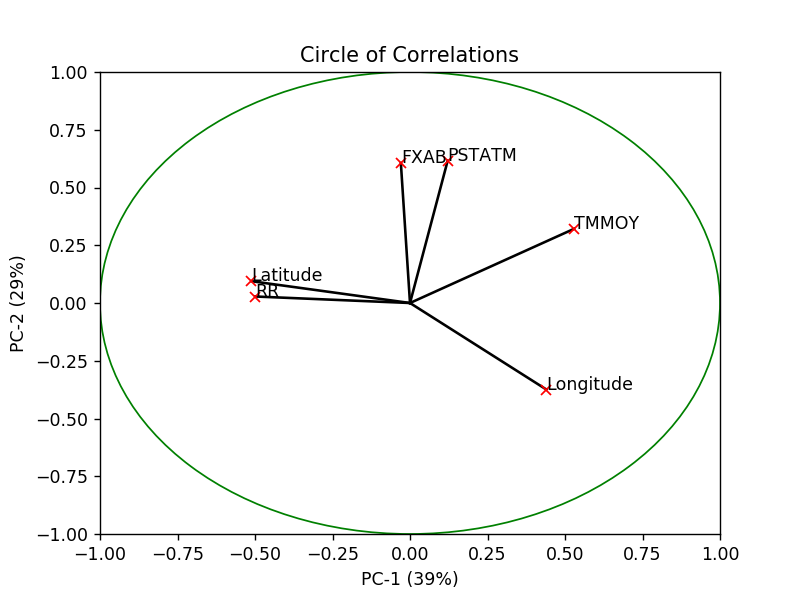

In [34]:
plt.figure()
pc_infos, ebouli = myPCA(meteo.drop(['Nom','Altitude'],1))
circleOfCorrelations(pc_infos, ebouli)

La  **Latitude** et la pluie (**RR**) ne sont corrélées qu'avec la première CP.
Le vent (**FXAB**) et la pression (**PSTATM**) ne sont corrélés qu'avec la deuxième CP.
La température (**TMMOY**) et  la **Longitude**  sont corrélées aux  deux premières CP.
Autrement dit, la première CP est une combinaison linéaire (essentiellement) de  **Latitude**, **RR**, **TMMOY** et   **Longitude**. La deuxière CP est une combinaison linéaire (essentiellement) de  **FXAB**, **PSTATM**, **TMMOY** et   **Longitude**.

## Quesiton 6
ACP avec la variable **Altitude**.

<IPython.core.display.Javascript object>


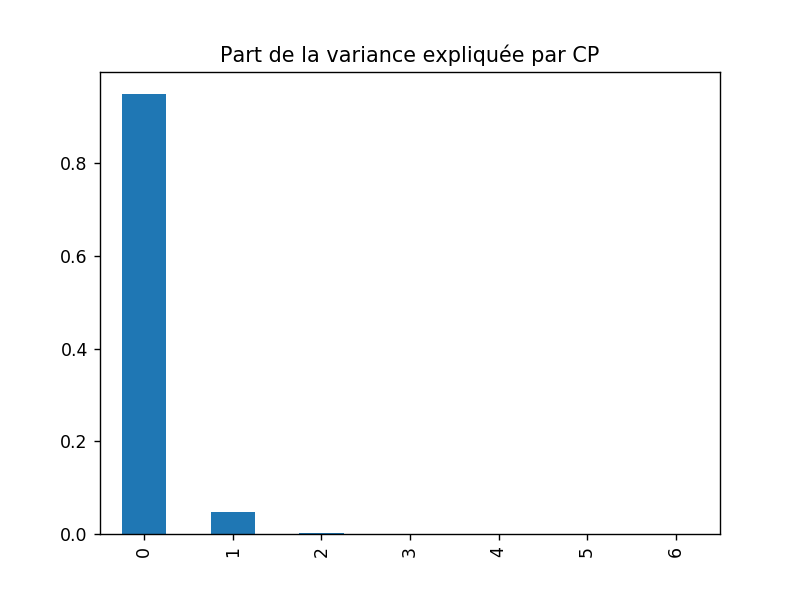

array([  9.49703742e-01,   4.82565831e-02,   1.17309729e-03,
         4.97982313e-04,   3.04057825e-04,   5.78885893e-05,
         6.64877852e-06])

In [35]:
sklearn_pca = PCA() 
meteo_pca = sklearn_pca.fit_transform(meteo.drop(['Nom'],1)) 
plt.figure()
scree = pd.Series(sklearn_pca.explained_variance_ratio_)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")
sklearn_pca.explained_variance_ratio_

<IPython.core.display.Javascript object>


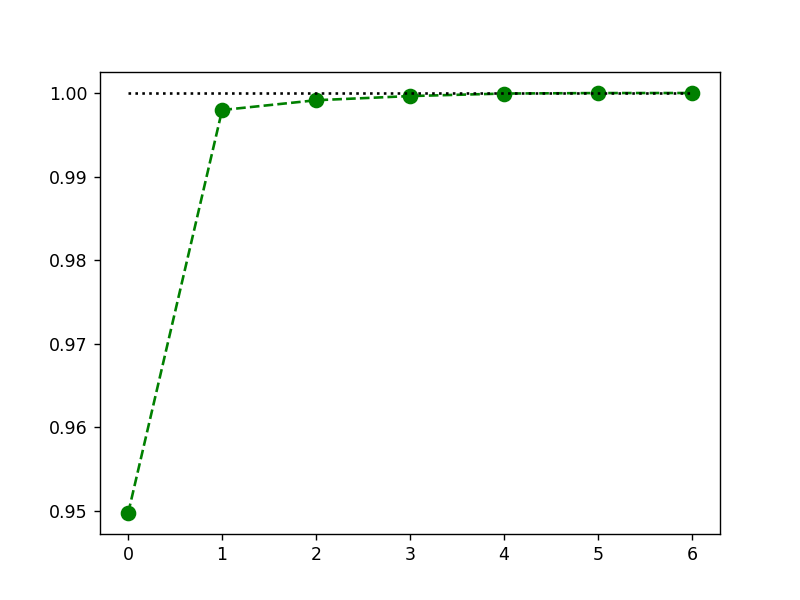

In [36]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

En ajoutant la variable **Altitude**, on observe que maintenant une seule CP suffit pour expliquer 95% de la variance totale !

<IPython.core.display.Javascript object>


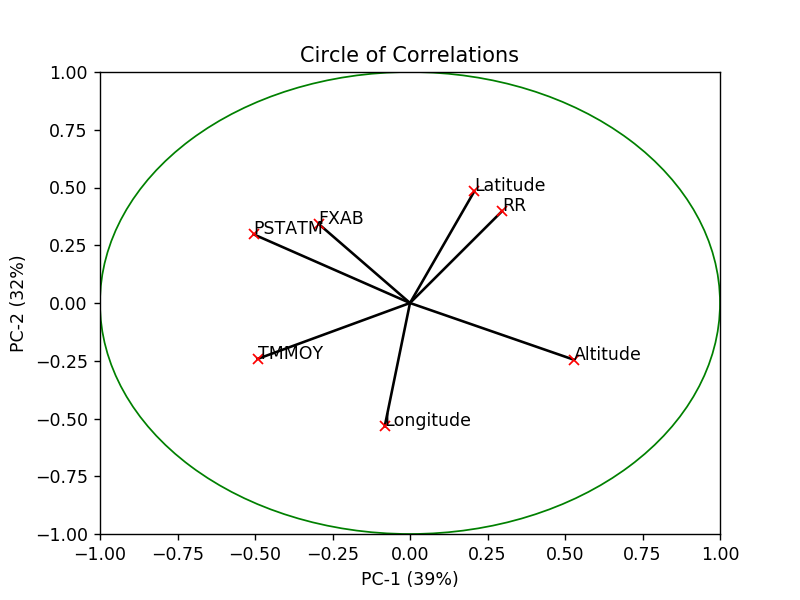

In [37]:
plt.figure()
pc_infos, ebouli = myPCA(meteo.drop(['Nom'],1))
circleOfCorrelations(pc_infos, ebouli)

En ajoutant la variable **Altitude** tout change. Cette variable est corrélées aux deux (nouvelles) CP. Les variables les moins corrélées à la première CP (qui est bien plus importante que la deuxième CP, vu sa part de variance expliquée très élevées) sont  la **Longitude** et la **Latitude**. En quelque sorte, l'ajout de l'**Altitude** rend les variables  **Longitude** et **Latitude** (presque) inutiles.